<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/ClassificationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AIEngineer/ticket.csv")
df.head(5)

,ticket_no,subject,description,impact,urgency,priority,ticket_type,group,service,channel_notification,category,sub_category,created_at
0,220711333,Interlink : MA วันที่ 15 กรกฎาคม 2565 เวลา 00....,"From: ""NQM Interlink Telecom"" <nqm@interlinkte...",Medium,Low,P4,Request,Inext Broadband,[Inext Broadband][Maintenance],R[Inext Broadband][Maintenance][Carrier],Interlink,NaN,2022-07-11 21:50:27.039832+00
1,22072423,[Closed]Promessy Corporation : แจ้งตรวจสอบเครื...,From: Werachat Nawaroongruang <werachat.nawaro...,Medium,Low,P4,Request,NOC,[Nutanix-Cloud][VMaaS],R[Nutanix-Cloud][VMaaS][Customer],Other,NaN,2022-07-24 05:00:51.878427+00
2,22081755,BAAC : รบกวนเข้าไปเก็บตัวกล่องสัญญาณที่สาขาสาร...,รับสายลูกค้าคุณสุริยา เบอร์ 0818863505 แจ้งมีต...,Medium,Low,P4,Request,Inext Broadband,[Inext Broadband][Internet-Standard (Node)],R[Inext Broadband][Internet-Standard (Node)][C...,Other,NaN,2022-08-17 03:50:55.028628+00
3,22091574,Transform You : แจ้งขอข้อมูล Lun ดังนี้ Offsit...,"From: ""Teerayut Saowamok"" <teerayut.sa@transfo...",Low,Medium,P4,Request,NOC,[Flexpod-Cloud][VMaaS],R[Flexpod-Cloud][VMaaS][Customer],Other,NaN,2022-09-15 03:57:30.501931+00
4,22090556,GSB[SD] : แบบคำขอเปลี่ยนแปลงทรัพยากรบน GSB Clo...,From: Servicedesk <servicedesk@inetms.co.th>\n...,Low,Medium,P4,Request,MS-Cloud,[MS-Cloud][VMaaS],I[MS-Cloud][VMaaS][Customer],NaN,NaN,2022-09-05 03:26:02.189656+00


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222489 entries, 0 to 222488
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ticket_no             222489 non-null  int64 
 1   subject               222489 non-null  object
 2   description           222409 non-null  object
 3   impact                222489 non-null  object
 4   urgency               222489 non-null  object
 5   priority              222489 non-null  object
 6   ticket_type           222489 non-null  object
 7   group                 222192 non-null  object
 8   service               210042 non-null  object
 9   channel_notification  210000 non-null  object
 10  category              165575 non-null  object
 11  sub_category          16073 non-null   object
 12  created_at            222489 non-null  object
dtypes: int64(1), object(12)
memory usage: 22.1+ MB


## **Predict class**

In [4]:
df['ticket_type'].unique()

array(['Request', 'Incident', 'Problem'], dtype=object)

In [5]:
df.shape

(222489, 13)

In [7]:
df.columns

Index(['ticket_no', 'subject', 'description', 'impact', 'urgency', 'priority',
       'ticket_type', 'group', 'service', 'channel_notification', 'category',
       'sub_category', 'created_at'],
      dtype='object')

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### **numerical columns**

`numerical_columns=['impact', 'urgency', 'priority', 'ticket_type']`

```
use mapping value
```



In [40]:
im_ur_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['impact'] = df['impact'].map(im_ur_mapping)
df['urgency'] = df['urgency'].map(im_ur_mapping)

[1 0 2]


In [41]:
prior_mapping = {'P1': 1, 'P2': 2, 'P3': 3, 'P4': 4, 'P5':5}
df['priority'] = df['priority'].map(prior_mapping)

In [42]:
label_mapping = {'Request': 0, 'Incident': 1, 'Problem': 2}
df['ticket_type'] = df['ticket_type'].map(label_mapping)

In [38]:
df.columns

Index(['ticket_no', 'subject', 'description', 'impact', 'urgency', 'priority',
       'ticket_type', 'group', 'service', 'channel_notification', 'category',
       'sub_category', 'created_at'],
      dtype='object')

In [44]:
df.head(5)

,ticket_no,subject,description,impact,urgency,priority,ticket_type,group,service,channel_notification,category,sub_category,created_at
0,220711333,Interlink : MA วันที่ 15 กรกฎาคม 2565 เวลา 00....,"From: ""NQM Interlink Telecom"" <nqm@interlinkte...",1,0,4,0,Inext Broadband,[Inext Broadband][Maintenance],R[Inext Broadband][Maintenance][Carrier],Interlink,NaN,2022-07-11 21:50:27.039832+00
1,22072423,[Closed]Promessy Corporation : แจ้งตรวจสอบเครื...,From: Werachat Nawaroongruang <werachat.nawaro...,1,0,4,0,NOC,[Nutanix-Cloud][VMaaS],R[Nutanix-Cloud][VMaaS][Customer],Other,NaN,2022-07-24 05:00:51.878427+00
2,22081755,BAAC : รบกวนเข้าไปเก็บตัวกล่องสัญญาณที่สาขาสาร...,รับสายลูกค้าคุณสุริยา เบอร์ 0818863505 แจ้งมีต...,1,0,4,0,Inext Broadband,[Inext Broadband][Internet-Standard (Node)],R[Inext Broadband][Internet-Standard (Node)][C...,Other,NaN,2022-08-17 03:50:55.028628+00
3,22091574,Transform You : แจ้งขอข้อมูล Lun ดังนี้ Offsit...,"From: ""Teerayut Saowamok"" <teerayut.sa@transfo...",0,1,4,0,NOC,[Flexpod-Cloud][VMaaS],R[Flexpod-Cloud][VMaaS][Customer],Other,NaN,2022-09-15 03:57:30.501931+00
4,22090556,GSB[SD] : แบบคำขอเปลี่ยนแปลงทรัพยากรบน GSB Clo...,From: Servicedesk <servicedesk@inetms.co.th>\n...,0,1,4,0,MS-Cloud,[MS-Cloud][VMaaS],I[MS-Cloud][VMaaS][Customer],NaN,NaN,2022-09-05 03:26:02.189656+00


In [69]:
df.shape

(222489, 13)

In [68]:
df.isnull().sum()

ticket_no                    0
subject                      0
description                 80
impact                       0
urgency                      0
priority                     0
ticket_type                  0
group                      297
service                  12447
channel_notification     12489
category                 56914
sub_category            206416
created_at                   0
dtype: int64

### **categorical columns**


`categorical_column = ['group','service','channel_notification','category']`


```
- get dummies first
- using KNN imputation
```

In [70]:
df['group'].nunique()

71

In [71]:
df['service'].nunique()

377

In [73]:
df['category'].nunique()

407

In [1]:
df['channel_notification'].unique()

NameError: name 'df' is not defined

In [ ]:
from sklearn.impute import KNNImputer

categorical_column = ['group','service','channel_notification','category']
df_encoded = pd.get_dummies(df, columns=['categorical_column'], drop_first=True)
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = knn_imputer.fit_transform(df_encoded)

In [74]:
df['description']

0         From: "NQM Interlink Telecom" <nqm@interlinkte...
1         From: Werachat Nawaroongruang <werachat.nawaro...
2         รับสายลูกค้าคุณสุริยา เบอร์ 0818863505 แจ้งมีต...
3         From: "Teerayut Saowamok" <teerayut.sa@transfo...
4         From: Servicedesk <servicedesk@inetms.co.th>\n...
                                ...                        
222484    From: "servicedesk@inetms.co.th" <servicedesk@...
222485    From: Nantida Vorasutipaibul <nantida.vo@inet....
222486    From: Siriporn Tanasin <siriporn.ta@inet.co.th...
222487    From: Kunanon Ruanlek <kunanon.ru@inet.co.th>\...
222488    From: Natkamon Thoungnuam <natkamon.th@inet.co...
Name: description, Length: 222489, dtype: object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222489 entries, 0 to 222488
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ticket_no             222489 non-null  int64 
 1   subject               222489 non-null  object
 2   description           222409 non-null  object
 3   impact                222489 non-null  int64 
 4   urgency               222489 non-null  int64 
 5   priority              222489 non-null  int64 
 6   ticket_type           222489 non-null  int64 
 7   group                 222192 non-null  object
 8   service               210042 non-null  object
 9   channel_notification  210000 non-null  object
 10  category              165575 non-null  object
 11  sub_category          16073 non-null   object
 12  created_at            222489 non-null  object
dtypes: int64(5), object(8)
memory usage: 22.1+ MB


In [67]:
check = df[['impact', 'urgency', 'priority', 'ticket_type']]

In [53]:
# Calculate the correlation matrix
correlation_matrix = check.corr()

# Extract the correlation of 'ticket_type' with other columns
ticket_type_correlation = correlation_matrix['ticket_type']

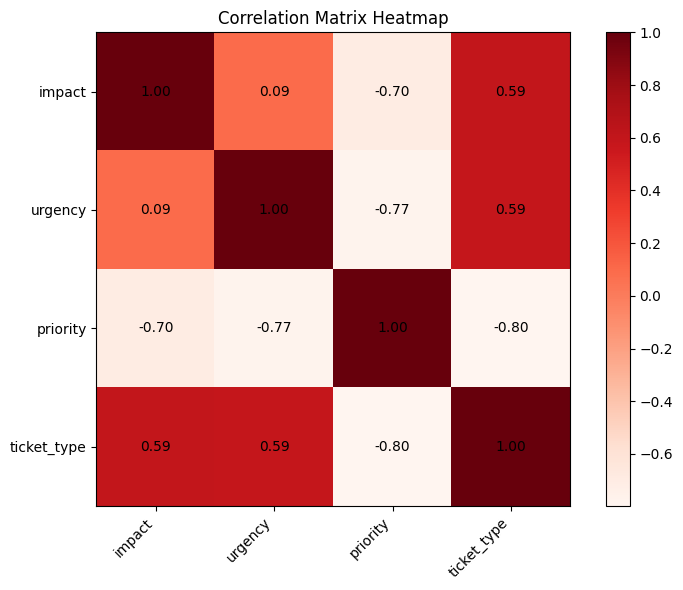

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
heatmap = plt.imshow(correlation_matrix, cmap='Reds', interpolation='nearest')
plt.colorbar(heatmap)

# Add the column and row names
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Add annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(i, j, f'{correlation_matrix.iloc[j, i]:.2f}',
                 ha='center', va='center', color='black')

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()

# Show the plot
plt.show()